In [1]:
from magicgap import *

In [ ]:
M_step = 50
M_max = 1000
M_range = np.arange(1, M_max+M_step, M_step)
d_b_range = list(range(3, 17))
data = []
for d_b in d_b_range:
    B = rand_basis(d_b-1, d_b)
    exact = avg_magic_subspace_qudit(qudit_wh_operators(d_b), B)
    approx = [avg_magic_subspace_mc(qudit_wh_operators(d_b), B, M=M)[0] for M in M_range]
    err = [float(exact - approx[i])**2 for i in range(len(M_range))]
    data.append(err)
    save_data("data/monte_carlo", {"M_step": M_step, "M_max": M_max, "d_b_range": d_b_range, "data": data})

In [2]:
M_step = 50
M_max = 1000
M_range = np.arange(1, M_max+M_step, M_step)
d_b_range = list(range(3, 17))

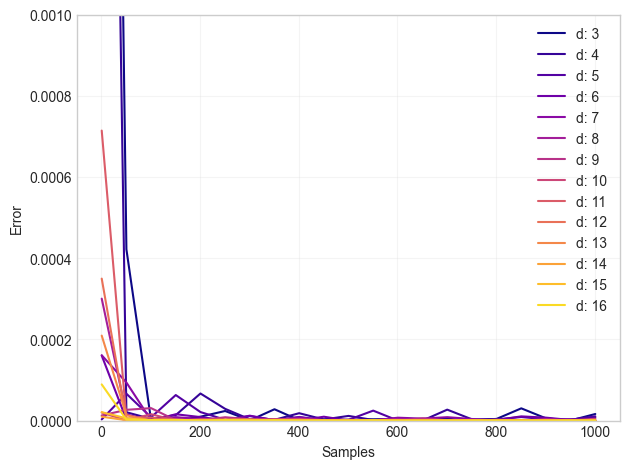

In [3]:
import matplotlib.colors as mcolors

globals().update(load_data("data/monte_carlo"))
plt.style.use('seaborn-v0_8-whitegrid')

norm = mcolors.Normalize(vmin=0, vmax=len(d_b_range))
cmap = plt.colormaps['plasma']  # Modern replacement

fig, ax = plt.subplots(1)
#ax.set_title("Error in Monte Carlo approximation")
ax.set_xlabel("Samples")
ax.set_ylabel("Error")
ax.set_ylim(0, 0.001)
ax.grid(True, alpha=0.2)
for i, d_b in enumerate(d_b_range):
    ax.plot(M_range, data[i], label="d: %d" % d_b, color=cmap(norm(i)))
ax.legend()
plt.tight_layout()
plt.savefig("img/monte_carlo.pdf", dpi=600, bbox_inches='tight')
plt.show()